In [27]:
%load_ext autoreload
%autoreload 2
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit,KFold,GridSearchCV
from sklearn.metrics import accuracy_score,fbeta_score,f1_score
import numpy as np
import matplotlib.pyplot as plt
from helpers import make_complexity_curve, make_learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


**Load Cleaned Adult Data**

In [ ]:
adult_df = pd.read_csv(filepath_or_buffer="adult_cleaned.csv")
adult_df_dummies = pd.get_dummies(adult_df.drop('target', 1))
adult_x = adult_df_dummies.copy().values
adult_y = adult_df["target"].copy().values
X_adult_train, X_adult_test, y_adult_train, y_adult_test = train_test_split(adult_x, adult_y, test_size=0.3,random_state=0)

**Load Cleaned Titanic Data**

In [ ]:
titanic_train = pd.read_csv(filepath_or_buffer="titanic_train_cleaned.csv")
titanic_test = pd.read_csv(filepath_or_buffer="titanic_test_cleaned.csv")
X_titanic_train = pd.get_dummies(titanic_train.drop("Survived", 1)).copy().values
y_titanic_train = titanic_train["Survived"]

**Load Spam**

In [56]:
spam_df = pd.read_csv('spambase2.csv', header=0)
spam_x = spam_df.drop('class', axis=1)
spam_y = spam_df['class']
X_spam_train, X_spam_test, y_spam_train, y_spam_test = train_test_split(spam_x, spam_y, test_size=0.3,random_state=0)
print(f"X_spam_train: {X_spam_train.shape}")
print(f"X_spam_test: {X_spam_test.shape}")
print(f"y_spam_train: {y_spam_train.shape}")
print(f"y_spam_test: {y_spam_test.shape}")

X_spam_train: (3220, 57)
X_spam_test: (1381, 57)
y_spam_train: (3220,)
y_spam_test: (1381,)


**Grid Search**

In [36]:
params = {
    'KNN__metric':['manhattan','euclidean','chebyshev'],
    'KNN__n_neighbors':np.arange(1,51,3),
    'KNN__weights':['uniform','distance']
}

In [37]:
pipeAdult = Pipeline([('Scale',StandardScaler()),('KNN',KNeighborsClassifier())])  
adult_cv = GridSearchCV(pipeAdult,param_grid=params, cv=5)
adult_cv.fit(X_adult_train.astype(float), y_adult_train.astype(float))
print(f"best params adult: {adult_cv.best_params_}")

best params adult: {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 43, 'KNN__weights': 'distance'}


In [57]:
pipeTitanic = Pipeline([('Scale',StandardScaler()),('KNN',KNeighborsClassifier())])
titanic_cv = GridSearchCV(pipeTitanic,param_grid=params, cv=5)
titanic_cv.fit(X_titanic_train.astype(float), y_titanic_train.astype(float))
titanic_cv.best_params_
print(f"best params titanic: {titanic_cv.best_params_}")

best params titanic: {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 10, 'KNN__weights': 'uniform'}


**n_neighbors no scaling**

Model Complexity Curve: knn_no_scaling - adult (n_neighbors)
best n_neighbors: 22
Complexity curve complete


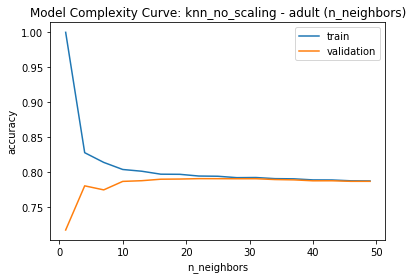

In [40]:
make_complexity_curve(KNeighborsClassifier(), X_adult_train, y_adult_train, "n_neighbors", np.arange(1,51,3),5,"knn_no_scaling", "adult")

Model Complexity Curve: knn_no_scaling - titanic (n_neighbors)
best n_neighbors: 22
Complexity curve complete


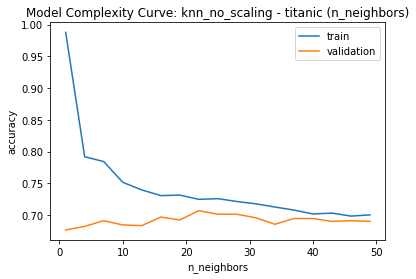

In [41]:
make_complexity_curve(KNeighborsClassifier(), X_titanic_train, y_titanic_train, "n_neighbors", np.arange(1,51,3),5,"knn_no_scaling", "titanic")

**n_neighbors with scaling**

Model Complexity Curve: knn_no_scaling - adult (KNN__n_neighbors)
best KNN__n_neighbors: 49
Complexity curve complete


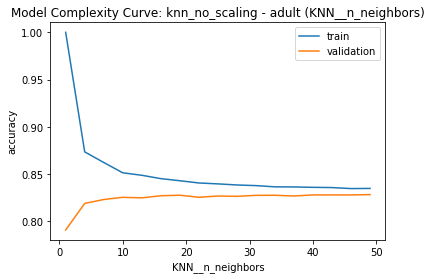

In [42]:
pipeAdult = Pipeline([('Scale',StandardScaler()),('KNN',KNeighborsClassifier())])  
make_complexity_curve(pipeAdult, X_adult_train.astype(float), y_adult_train.astype(float), "KNN__n_neighbors", np.arange(1,51,3),5,"knn_no_scaling", "adult")

Model Complexity Curve: knn_no_scaling - titanic (KNN__n_neighbors)
best KNN__n_neighbors: 10
Complexity curve complete


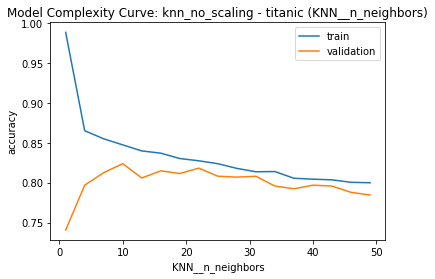

In [43]:
pipeTitanic = Pipeline([('Scale',StandardScaler()),('KNN',KNeighborsClassifier())])  
make_complexity_curve(pipeTitanic, X_titanic_train.astype(float), y_titanic_train.astype(float), "KNN__n_neighbors", np.arange(1,51,3),5,"knn_no_scaling", "titanic")

Model Complexity Curve: knn_no_scaling - spam (KNN__n_neighbors)
best KNN__n_neighbors: 1


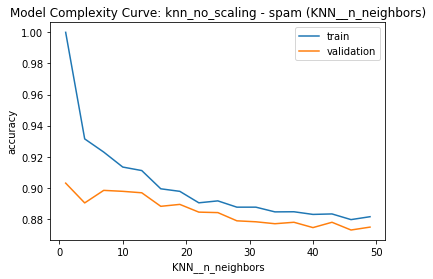

Complexity curve complete


In [58]:
pipeSpam = Pipeline([('Scale',StandardScaler()),('KNN',KNeighborsClassifier())])  
make_complexity_curve(pipeSpam, X_spam_train.astype(float), y_spam_train.astype(float), "KNN__n_neighbors", np.arange(1,51,3),5,"knn_no_scaling", "spam")